# Problem Statement:

Prediction of Price of Used Car based on various parameters.

> Add blockquote




# Import the Libraries

In [ ]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# Importing the dataset

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/sahilrahman12/Price_prediction_of_used_Cars_-Predictive_Analysis-/master/car_data.csv")

In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


# Data Analysis and EDA

In [ ]:
df.ndim

2

In [ ]:
df.shape

(4340, 8)

In [ ]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
df.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


In [ ]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [ ]:
df['fuel'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [ ]:
df['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [ ]:
df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [ ]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [ ]:
# crete a column new_fuel and place it at a index of the fuel column
'''Replace the values as:
'Petrol' ->0
'Diesel' ->1
'CNG'     ->2
'LPG'     ->3
'Electric'->4 '''

In [ ]:
dfc = df.copy()

In [ ]:
x=df.fuel.replace({'Petrol':0, 'Diesel':1, 'CNG':2, 'LPG':3, 'Electric':4})
df.insert(4,'new_fuel',x)

In [ ]:
dfc.new_fuel.unique()

array([0, 1, 2, 3, 4])

In [ ]:
dfc.head()

,name,year,selling_price,km_driven,new_fuel,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,0,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,Diesel,Individual,Manual,Second Owner


In [ ]:
# crete a column new_seller_type and place it at a index of the seller_type column
'''Replace the values as:
'Individual' ->0
 'Dealer'' ->1
 'Trustmark Dealer' ->2 '''
x=df.seller_type.replace({'Individual' :0,'Dealer' :1,'Trustmark Dealer' :2})
df.insert(df.columns.get_loc('seller_type'),'new_seller_type',x)

In [ ]:
df.new_seller_type.unique()

array([0, 1, 2])

In [ ]:
df.head()

,name,year,selling_price,km_driven,new_fuel,fuel,new_seller_type,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,Petrol,0,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,Petrol,0,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,Diesel,0,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,0,Petrol,0,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,Diesel,0,Individual,Manual,Second Owner


In [ ]:
df['fuel']=LabelEncoder().fit_transform(df['fuel'])
df['seller_type']=LabelEncoder().fit_transform(df['seller_type'])
df['transmission']=LabelEncoder().fit_transform(df['transmission'])
df['owner']=LabelEncoder().fit_transform(df['owner'])

In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,4,1,1,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,4,1,1,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,1,0
3,Datsun RediGO T Option,2017,250000,46000,4,1,1,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,1,2


In [ ]:
# Create a column no_of_years = current year - year
df['current_year'] = 2023
df['no_of_years']=df['current_year']-df['year']
#df.insert(df.columns.get_loc['years'],'no_of_years',x)

In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,current_year,no_of_years
0,Maruti 800 AC,2007,60000,70000,4,1,1,0,2023,16
1,Maruti Wagon R LXI Minor,2007,135000,50000,4,1,1,0,2023,16
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,1,0,2023,11
3,Datsun RediGO T Option,2017,250000,46000,4,1,1,0,2023,6
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,1,2,2023,9


In [ ]:
# Drop columns - name,year,current_year
# Rename selling_price to current_selling_price
df.drop(['name','year','current_year'],axis=1,inplace=True)
df.rename(columns={'selling_price':'current_selling_price'},inplace=True)

In [ ]:
df.head()

,current_selling_price,km_driven,fuel,seller_type,transmission,owner,no_of_years
0,60000,70000,4,1,1,0,16
1,135000,50000,4,1,1,0,16
2,600000,100000,1,1,1,0,11
3,250000,46000,4,1,1,0,6
4,450000,141000,1,1,1,2,9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   current_selling_price  4340 non-null   int64
 1   km_driven              4340 non-null   int64
 2   fuel                   4340 non-null   int64
 3   seller_type            4340 non-null   int64
 4   transmission           4340 non-null   int64
 5   owner                  4340 non-null   int64
 6   no_of_years            4340 non-null   int64
dtypes: int64(7)
memory usage: 237.5 KB


In [ ]:
df.corr()

,current_selling_price,km_driven,fuel,seller_type,transmission,owner,no_of_years
current_selling_price,1.000000,-0.192289,-0.269653,-0.151554,-0.530205,-0.207840,-0.413922
km_driven,-0.192289,1.000000,-0.286095,0.113689,0.120226,0.297115,0.419688
fuel,-0.269653,-0.286095,1.000000,0.038797,0.039249,-0.010910,0.120002
seller_type,-0.151554,0.113689,0.038797,1.000000,0.174925,0.165681,0.098352
transmission,-0.530205,0.120226,0.039249,0.174925,1.000000,0.078893,0.143800
owner,-0.207840,0.297115,-0.010910,0.165681,0.078893,1.000000,0.414705
no_of_years,-0.413922,0.419688,0.120002,0.098352,0.143800,0.414705,1.000000


<Axes: >

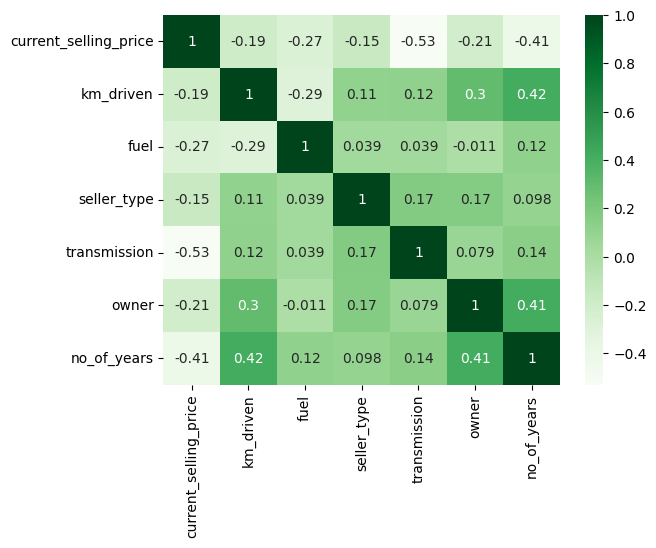

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap="Greens")

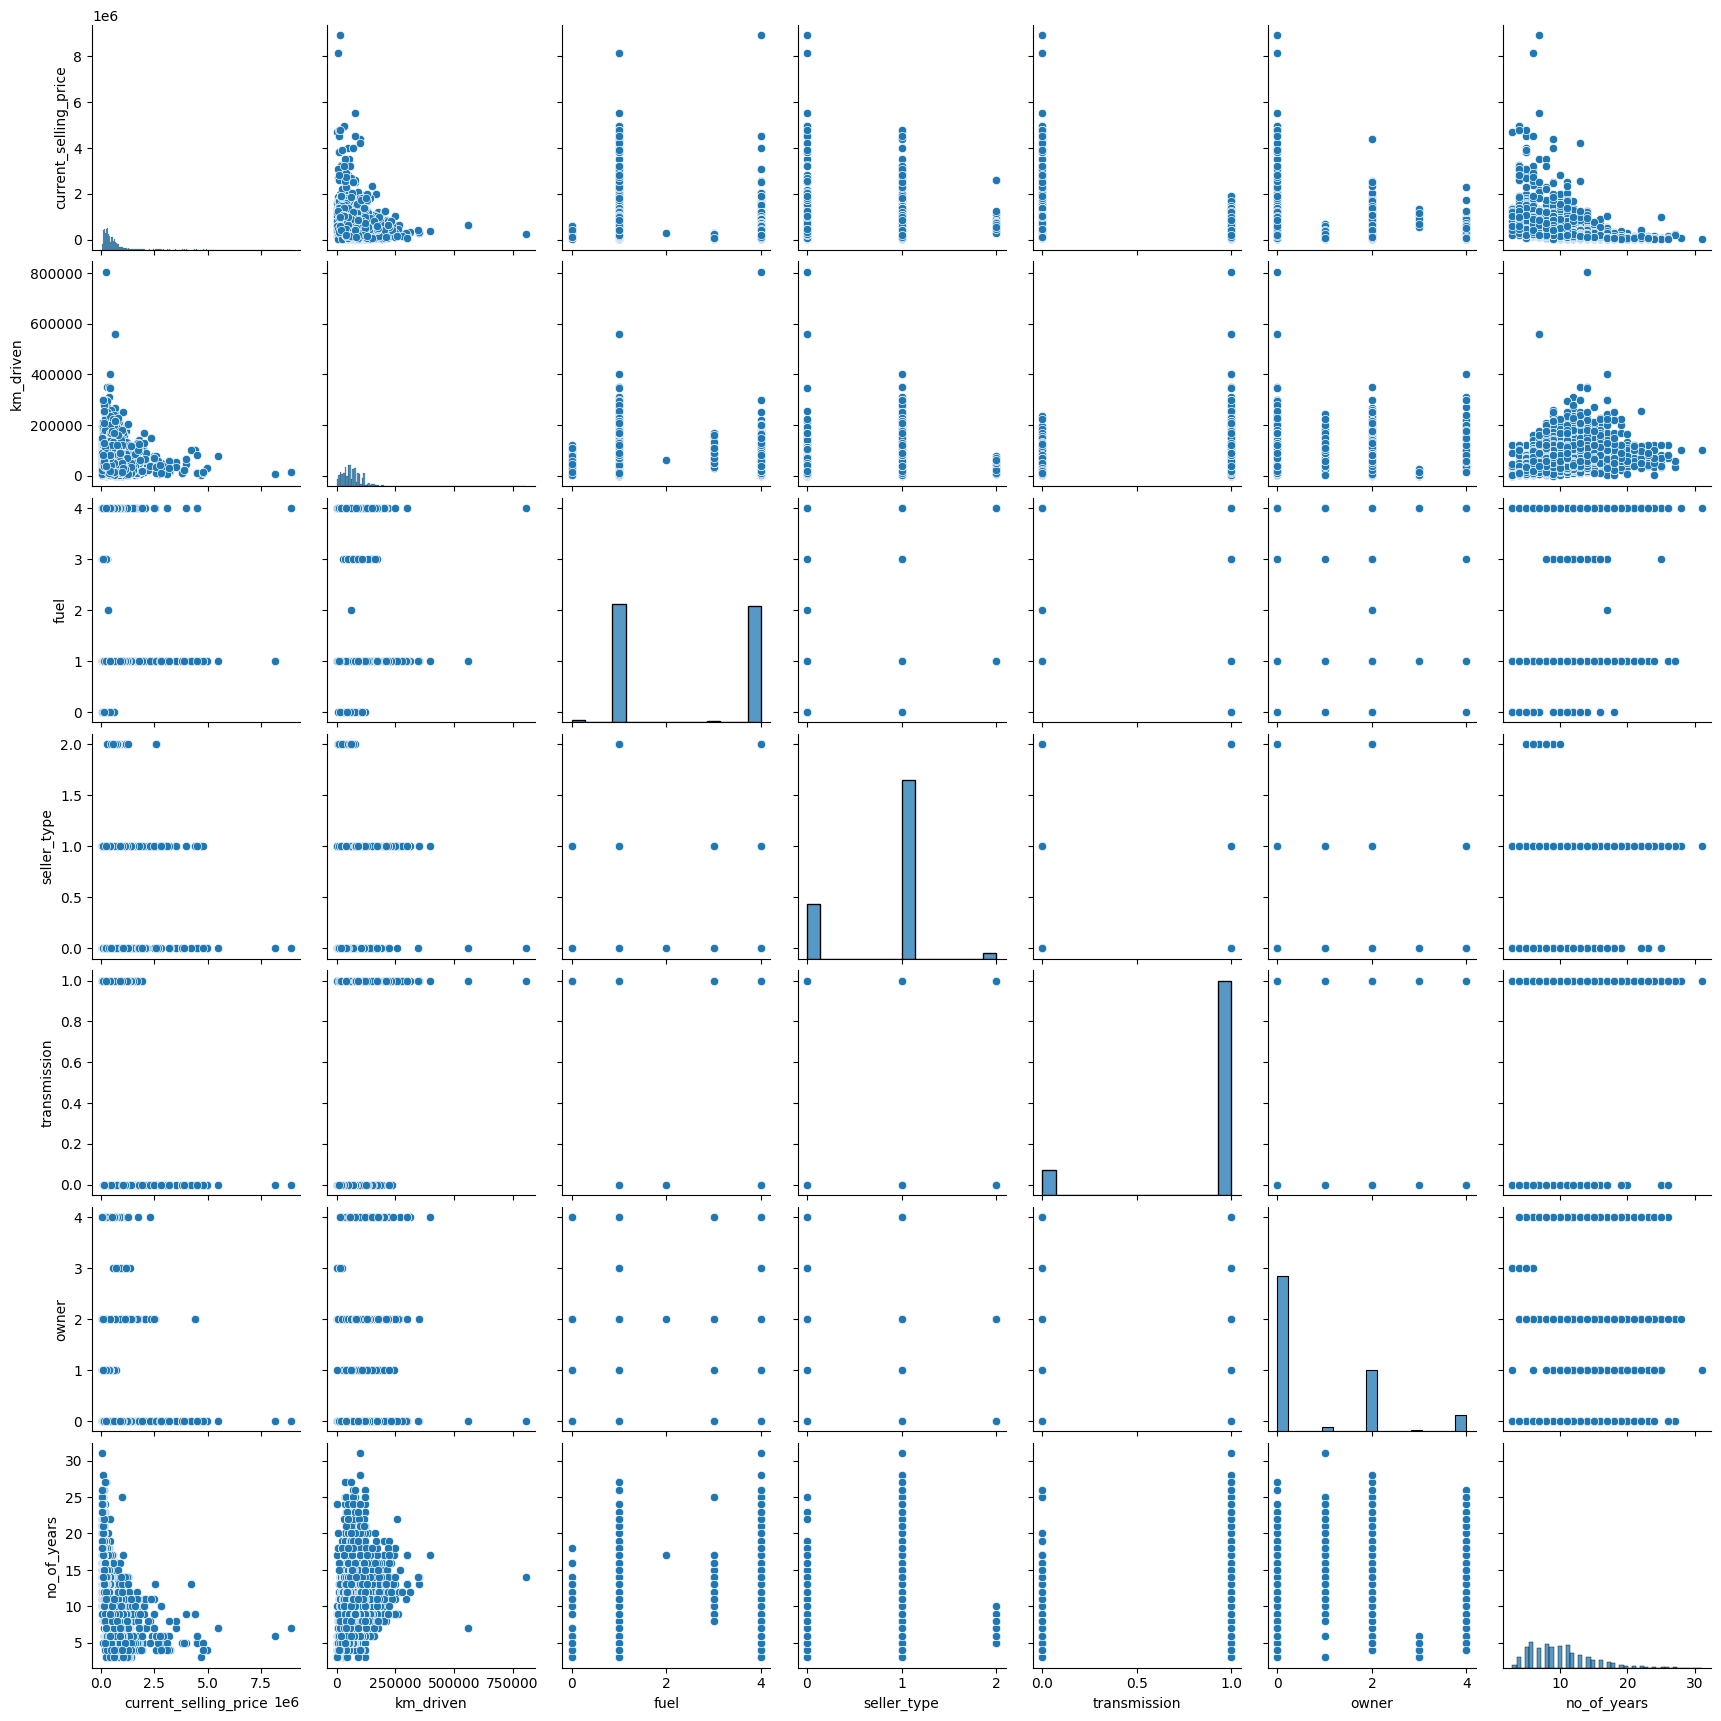

In [ ]:
# pair plot
sns.pairplot(df)

<Axes: >

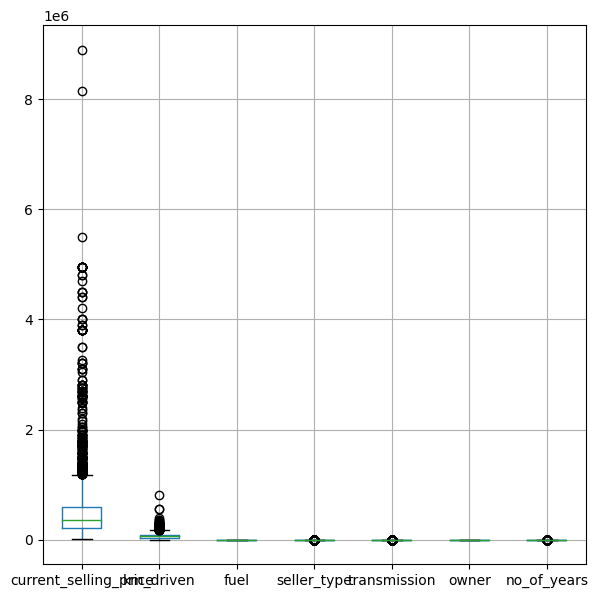

In [ ]:
plt.figure(figsize=(7,7))
df.boxplot()

# Select the features and the target

In [ ]:
x= np.array(df.drop('current_selling_price',axis=1,))
y= np.array(df.current_selling_price)

In [ ]:
x

array([[ 70000,      4,      1,      1,      0,     16],
       [ 50000,      4,      1,      1,      0,     16],
       [100000,      1,      1,      1,      0,     11],
       ...,
       [ 83000,      4,      1,      1,      2,     14],
       [ 90000,      1,      1,      1,      0,      7],
       [ 40000,      4,      1,      1,      0,      7]])

In [ ]:
y

array([ 60000, 135000, 600000, ..., 110000, 865000, 225000])

Feature Slection on basis of correlation
feature scaling

# Splitting the data

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
len(x_train)

3472

In [ ]:
len(y_train)

3472

# Choosing the model

In [ ]:
regressor = DecisionTreeRegressor()

# Training the Model

In [ ]:
regressor.fit(x_train.reshape(-1,1),y_train.reshape(-1,1))

ValueError: Number of labels=3472 does not match number of samples=20832

In [ ]:
y_pred = regressor.predict(x_test)

In [ ]:
y_pred

array([ 625000.        ,  300000.        ,  650000.        ,
        380000.        ,  105000.        ,  479000.        ,
        240000.        ,  458000.        ,  100000.        ,
        550000.        ,  210000.        ,  180000.        ,
        421499.875     ,  217666.66666667,  234999.5       ,
       1225000.        ,  450000.        , 3800000.        ,
        450000.        ,  740000.        ,  790000.        ,
        262999.8       ,  210000.        ,  540000.        ,
        148333.33333333,  355000.        ,  207500.        ,
        256666.66666667,  220000.        ,  419000.        ,
        280000.        ,  927500.        ,  350000.        ,
        138333.        ,  450000.        ,  493833.33333333,
        425000.        , 1140000.        ,  479000.        ,
        555000.        ,  900000.        ,  233750.        ,
        600000.        ,  350000.        ,  185000.        ,
        105000.        ,  478750.        ,  106250.        ,
        110000.        ,

# Testing the model

In [ ]:
target = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})

In [ ]:
target

,Actual,Predicted
0,625000,625000.000000
1,320000,300000.000000
2,1249000,650000.000000
3,380000,380000.000000
4,105000,105000.000000
...,...,...
863,780000,639999.875000
864,600000,200000.000000
865,220000,160000.000000
866,60000,65000.000000


ValueError: x and y must be the same size

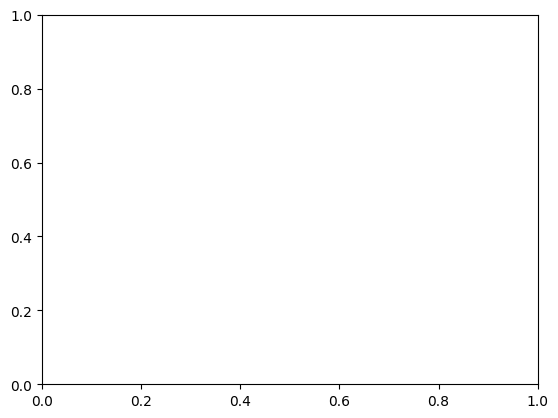

In [ ]:
plt.scatter(x_test,y_test,color='red')
plt.scatter(x_test,y_pred,color='green')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual v/s Predicted')

<Axes: >

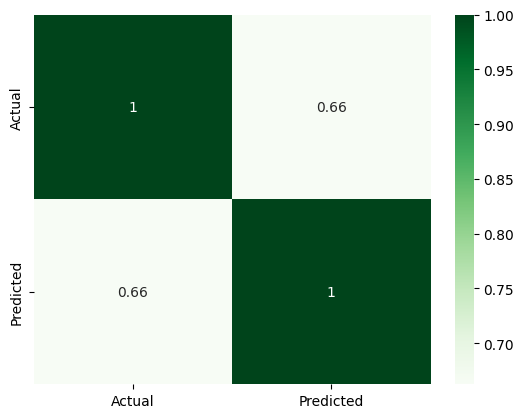

In [ ]:
sns.heatmap(target.corr(),annot=True,cmap="Greens")

# Performance

In [ ]:
r2_score(y_test,y_pred)

0.19316093214221786

In [ ]:
new_df =df.copy()

In [ ]:
new_df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'new_fuel', 'fuel',
       'new_seller_type', 'seller_type', 'transmission', 'owner'],
      dtype='object')

In [ ]:
new_df = new_df[['fuel','seller_type']]

In [ ]:
new_df.head()

,fuel,seller_type
0,Petrol,Individual
1,Petrol,Individual
2,Diesel,Individual
3,Petrol,Individual
4,Diesel,Individual


In [ ]:
type(new_df)

pandas.core.frame.DataFrame

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
new_df['fuel']=LabelEncoder().fit_transform(new_df['fuel'])

In [ ]:
new_df['fuel'].unique()

array([4, 1, 0, 3, 2])

In [ ]:
new_df.head()

,fuel,seller_type
0,4,Individual
1,4,Individual
2,1,Individual
3,4,Individual
4,1,Individual


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
var = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),['seller_type',remainder='passthrough'])])

In [ ]:
new_df= df.copy()

In [ ]:
#new_df = pd.get_dummies(new_df)

In [ ]:
#new_df

,year,selling_price,km_driven,new_fuel,new_seller_type,name_Ambassador CLASSIC 1500 DSL AC,name_Ambassador Classic 2000 Dsz,name_Ambassador Grand 1800 ISZ MPFI PW CL,name_Audi A4 1.8 TFSI,name_Audi A4 2.0 TDI,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2007,60000,70000,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
1,2007,135000,50000,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
2,2012,600000,100000,1,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
3,2017,250000,46000,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
4,2014,450000,141000,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,2014,409999,80000,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4336,2014,409999,80000,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4337,2009,110000,83000,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4338,2016,865000,90000,1,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0


In [ ]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(new_df)

OneHotEncoder(handle_unknown='ignore')

In [ ]:
new_df

,fuel,seller_type
0,4,Individual
1,4,Individual
2,1,Individual
3,4,Individual
4,1,Individual
...,...,...
4335,1,Individual
4336,1,Individual
4337,4,Individual
4338,1,Individual
